<a href="https://colab.research.google.com/github/josh030603/My-Deep-Learning-Projects/blob/main/mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="10">**MNIST - Using An Artificial Neural Network**</font>

**OBJECTIVE :**

The aim of this project is to construct and train an artificial neural network(ANN) on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60,000 images for training and 10,000 test images. The artificial neural network will be constructed using Keras Python API with TensorFlow as the backend.

<font size="5">Importing the necessary packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


<font size="5">Loading and assigning the MNIST data set

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


<font size="5">Examining a single digit a little closer, and printing out the matrix representing the 100th digit.

In [ ]:
X_train[100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<font size="4">Every digit is represented in the form of pixels. We just printed the matrix of pixels representing the 100th digit in the data set. Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This is called a single-channel pixel.

.

* <font size="4">While passing an image through an Artificial Neural Network, it is more convinient to flatten the matrix of pixels into a vector.

* <font size="4">The 28 x 28 matrix of pixels can be flattened into a vector of length 784

* <font size="4">The value of each pixel currently ranges from 0 to 255. The values of these pixels can be normalized to lie in the range 0 to 1.

* <font size="4">Normalization of inputs in ANN's not only speeds up the learning process, but also leads to a faster convergence

In [ ]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

<font size="6">**One Hot Encoding**

<font size="4">The unique digits are one-hot encoded to simplify training and testing.

<font size="4">0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]

<font size="4">1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]

<font size="4">2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]

<font size="4">etc. 

In [ ]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# <font size="4">Splitting the training dataset into a cross validation and training dataset.

stratify=Y_train ensures that similar data isn't clumped together

If the data is not stratified, there could arise a random state where all 8's or any number for that matter, go to the cross validation dataset and not even a single image of that number is in the training dataset</font>

In [ ]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,stratify=Y_train);

<font size="6">**Building a 4-Layer Fully Connected Neural Network**



*   <font size="4">1st layer: 512 units with a rectified linear activation function (ReLu) along with the input shape
*   2nd layer: 512 units with a rectified linear activation function (ReLu)
*   3rd layer: 512 units with a Scaled Exponential Linear Unit (SELU)
*   4th layer (Output Layer) : 10 units with a Softmax activation function</font>




In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))


model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('selu'))

model.add(Dense(10))
model.add(Activation('softmax'))


<font size="6">**Compiling The Model :**

*   <font size="4">The categorical cross entropy function(categorical_crossentropy) is used as the loss function
*   The adam optimizer is used, The SGD optimizer could also be used, however, for this Neural Network, the adam optimizer gave a better accuracy.</font>



In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<font size="6">**Training The Model :**

*   <font size="4">The batch size is kept at 128
*   Number of epochs is 5</font>



In [ ]:
network_history=model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1,validation_data=(X_val,Y_val))

Epoch 1/5
352/352 [==============================] - 9s 24ms/step - loss: 0.2339 - accuracy: 0.9281 - val_loss: 0.1297 - val_accuracy: 0.9587
Epoch 2/5
352/352 [==============================] - 8s 23ms/step - loss: 0.0870 - accuracy: 0.9734 - val_loss: 0.1037 - val_accuracy: 0.9691
Epoch 3/5
352/352 [==============================] - 8s 23ms/step - loss: 0.0585 - accuracy: 0.9812 - val_loss: 0.1041 - val_accuracy: 0.9705
Epoch 4/5
352/352 [==============================] - 8s 23ms/step - loss: 0.0434 - accuracy: 0.9862 - val_loss: 0.1015 - val_accuracy: 0.9723
Epoch 5/5
352/352 [==============================] - 9s 24ms/step - loss: 0.0375 - accuracy: 0.9877 - val_loss: 0.1015 - val_accuracy: 0.9725


<font size="6">**Evaluating The Model :**



*   <font size="4">The accuracy of the Neural Network on the testing dataset is 97.41%



In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0989 - accuracy: 0.9741
Test score: 0.09893950819969177
Test accuracy: 0.9740999937057495


<font size="6">**Visualising The Data :**

 <font size="4">The figure below shows the predicted classes and the actual classes of few images which the model correctly or incorrectly predicted.</font> 

In [ ]:
predicted_classes =np.argmax(model.predict(X_test),axis=1)

correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 2s 5ms/step


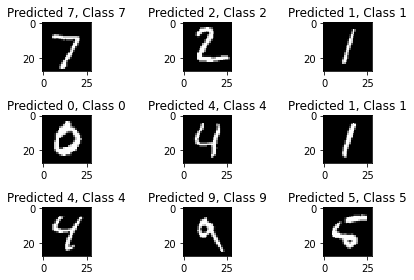

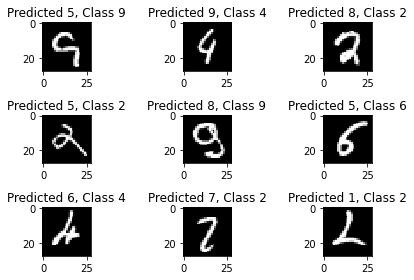

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

<font size="6">**Visualising Loss and Accuracy with the Number of Epochs :**

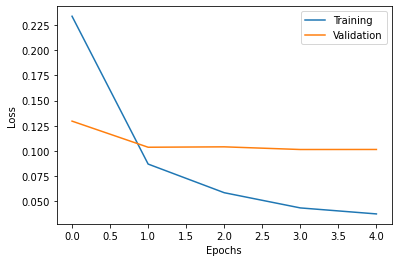

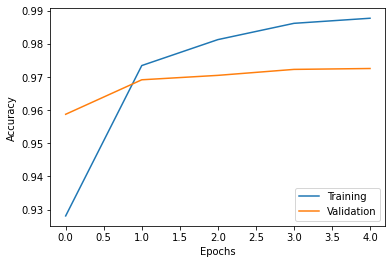

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)